In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Step 1: Define the regions and their corresponding states as you previously provided
regions = {
    'South': ['AL', 'AR', 'FL', 'GA', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'],
    'Northeast': ['CT', 'DE', 'DC', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'KY', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
}

# Step 2: Create a mapping from zip_code to the new column values based on the regions
zip_to_new_column = {}

for state, zip_codes in sub.items():
    region_name = None
    for region, states in regions.items():
        if state in states:
            region_name = region
            break
    if region_name:
        for code in zip_codes:
            zip_to_new_column[code] = f"{state} {region_name} sub-urbs"

# Step 3: Replace zip_code values with the new column values
new_df['new_column'] = new_df['zip_code'].map(zip_to_new_column)


In [2]:
data = pd.read_csv('loan_data.csv')

C:\Users\modza\AppData\Local\Temp\ipykernel_6964\1593645552.py:1: DtypeWarning: Columns (9,72) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data.csv')


In [3]:
data.head(2)

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,...,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verified_status_joint,zip_code
0,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/22/11 > I need to upgra...,...,5861.071414,5831.78,861.07,0.0,5000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,860xx
1,0.0,GA,NaN,30000.0,NaN,INDIVIDUAL,1.11,0.0,0.0,Borrower added on 12/22/11 > I plan to use t...,...,1008.710000,1008.71,435.17,0.0,456.46,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,309xx


In [4]:
dt = pd.read_csv('loan_data_datatypes.csv')
dt.head(5)

,TYPE,DESCRIPTION,actual_dt
0,boolean,The number of accounts on which the borrower i...,float64
1,object,The state provided by the borrower in the loan...,object
2,object,Balance to credit limit on all trades.,float64
3,float64,The self-reported annual income provided by th...,float64
4,object,The combined self-reported annual income provi...,float64


# Missing value treatment

In [7]:
missing_values = pd.DataFrame({'mv_count':data.isnull().sum(),
                                'percent_missing':data.isnull().sum()/len(data) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False)

In [12]:
data.drop(missing_values[missing_values.percent_missing.gt(80)].index,axis =1, inplace = True)

In [13]:
 pd.DataFrame({'mv_count':data.isnull().sum(),
                                'percent_missing':data.isnull().sum()/len(data) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False)

,mv_count,percent_missing
mths_since_last_major_derog,665676,75.015974
mths_since_last_delinq,454312,51.197065
next_pymnt_d,252971,28.507661
total_rev_hi_lim,70276,7.919502
tot_cur_bal,70276,7.919502
tot_coll_amt,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571


In [20]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [23]:
data[data['loan_status'].isin(['Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'])].index

Int64Index([   318,    607,    749,   1453,   1497,   1644,   1918,   2135,
              2470,   2507,
            ...
            887188, 887192, 887231, 887248, 887258, 887276, 887280, 887322,
            887337, 887345],
           dtype='int64', length=32629)

In [24]:
df  =data.copy()

In [25]:
df.drop(data[data['loan_status'].isin(['Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'])].index,inplace = True)

In [26]:
df.reset_index(drop = True)

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,zip_code
0,0.0,AZ,24000.0,INDIVIDUAL,0.00,0.0,0.0,27.65,Jan-85,10+ years,...,9.0,5861.071414,5831.78,861.07,0.00,5000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Verified,860xx
1,0.0,GA,30000.0,INDIVIDUAL,1.11,0.0,0.0,1.00,Apr-99,< 1 year,...,4.0,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,309xx
2,0.0,IL,12252.0,INDIVIDUAL,0.00,0.0,0.0,8.72,Nov-01,10+ years,...,10.0,3003.653644,3003.65,603.65,0.00,2400.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Not Verified,606xx
3,0.0,CA,49200.0,INDIVIDUAL,0.00,0.0,0.0,20.00,Feb-96,10+ years,...,37.0,12226.302210,12226.30,2209.33,16.97,10000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,917xx
4,0.0,OR,80000.0,INDIVIDUAL,0.00,0.0,0.0,17.94,Jan-96,1 year,...,38.0,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,972xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854745,0.0,CA,31000.0,INDIVIDUAL,0.00,0.0,0.0,28.69,Sep-04,8 years,...,15.0,3971.880000,3971.88,1027.35,0.00,2944.53,17100.0,https://www.lendingclub.com/browse/loanDetail....,Verified,905xx
854746,0.0,NJ,79000.0,INDIVIDUAL,0.00,0.0,0.0,3.90,Mar-74,10+ years,...,23.0,9532.390000,9532.39,2465.65,0.00,7066.74,10200.0,https://www.lendingclub.com/browse/loanDetail....,Verified,072xx
854747,0.0,TN,35000.0,INDIVIDUAL,0.00,0.0,0.0,30.90,Sep-03,5 years,...,22.0,3769.740000,3769.74,1925.24,0.00,1844.50,18000.0,https://www.lendingclub.com/browse/loanDetail....,Verified,378xx
854748,0.0,MA,64400.0,INDIVIDUAL,0.00,1.0,1.0,27.19,Oct-03,1 year,...,20.0,3787.670000,3787.67,2234.98,0.00,1552.69,27000.0,https://www.lendingclub.com/browse/loanDetail....,Source Verified,010xx


In [29]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [96]:
df.drop(['mths_since_last_major_derog'],axis = 1,inplace = True)

In [97]:
df.drop(df[df['loan_status'].eq('Current')].index,inplace = True)

In [98]:
obj = []
num = []

In [99]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending = False).head(10)

next_pymnt_d                  100.000000
mths_since_last_delinq         55.666460
total_rev_hi_lim               25.183914
tot_cur_bal                    25.183914
tot_coll_amt                   25.183914
emp_title                       5.506955
emp_length                      3.912306
last_pymnt_d                    0.208324
revol_util                      0.078665
collections_12_mths_ex_med      0.022137
dtype: float64

In [75]:
af = (data.isnull().sum()/len(data) * 100).sort_values(ascending = False).head(10).index

In [100]:
for i in (data.isnull().sum()/len(data) * 100).sort_values(ascending = False).head(10).index:
    if data[i].dtype == 'object':
        obj.append(i)
    else:
        num.append(i)

In [89]:
obj

['next_pymnt_d', 'emp_title', 'emp_length', 'last_pymnt_d']

## Imputation using mode in categorical columns

In [104]:
for i in obj:
    df[i].fillna(df[i].mode()[0],inplace = True)
    

In [105]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending = False).head(10)

next_pymnt_d                  100.000000
mths_since_last_delinq         55.666460
total_rev_hi_lim               25.183914
tot_cur_bal                    25.183914
tot_coll_amt                   25.183914
emp_title                       5.506955
emp_length                      3.912306
last_pymnt_d                    0.208324
revol_util                      0.078665
collections_12_mths_ex_med      0.022137
dtype: float64

## Imputation using mean and median in numeric

In [93]:
num

['mths_since_last_delinq',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'revol_util',
 'collections_12_mths_ex_med']

##### Prior to begin imputation , let's check out the distribution to make sure whether the data is normal or not

array(['Fully Paid', 'Charged Off', 'Default', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

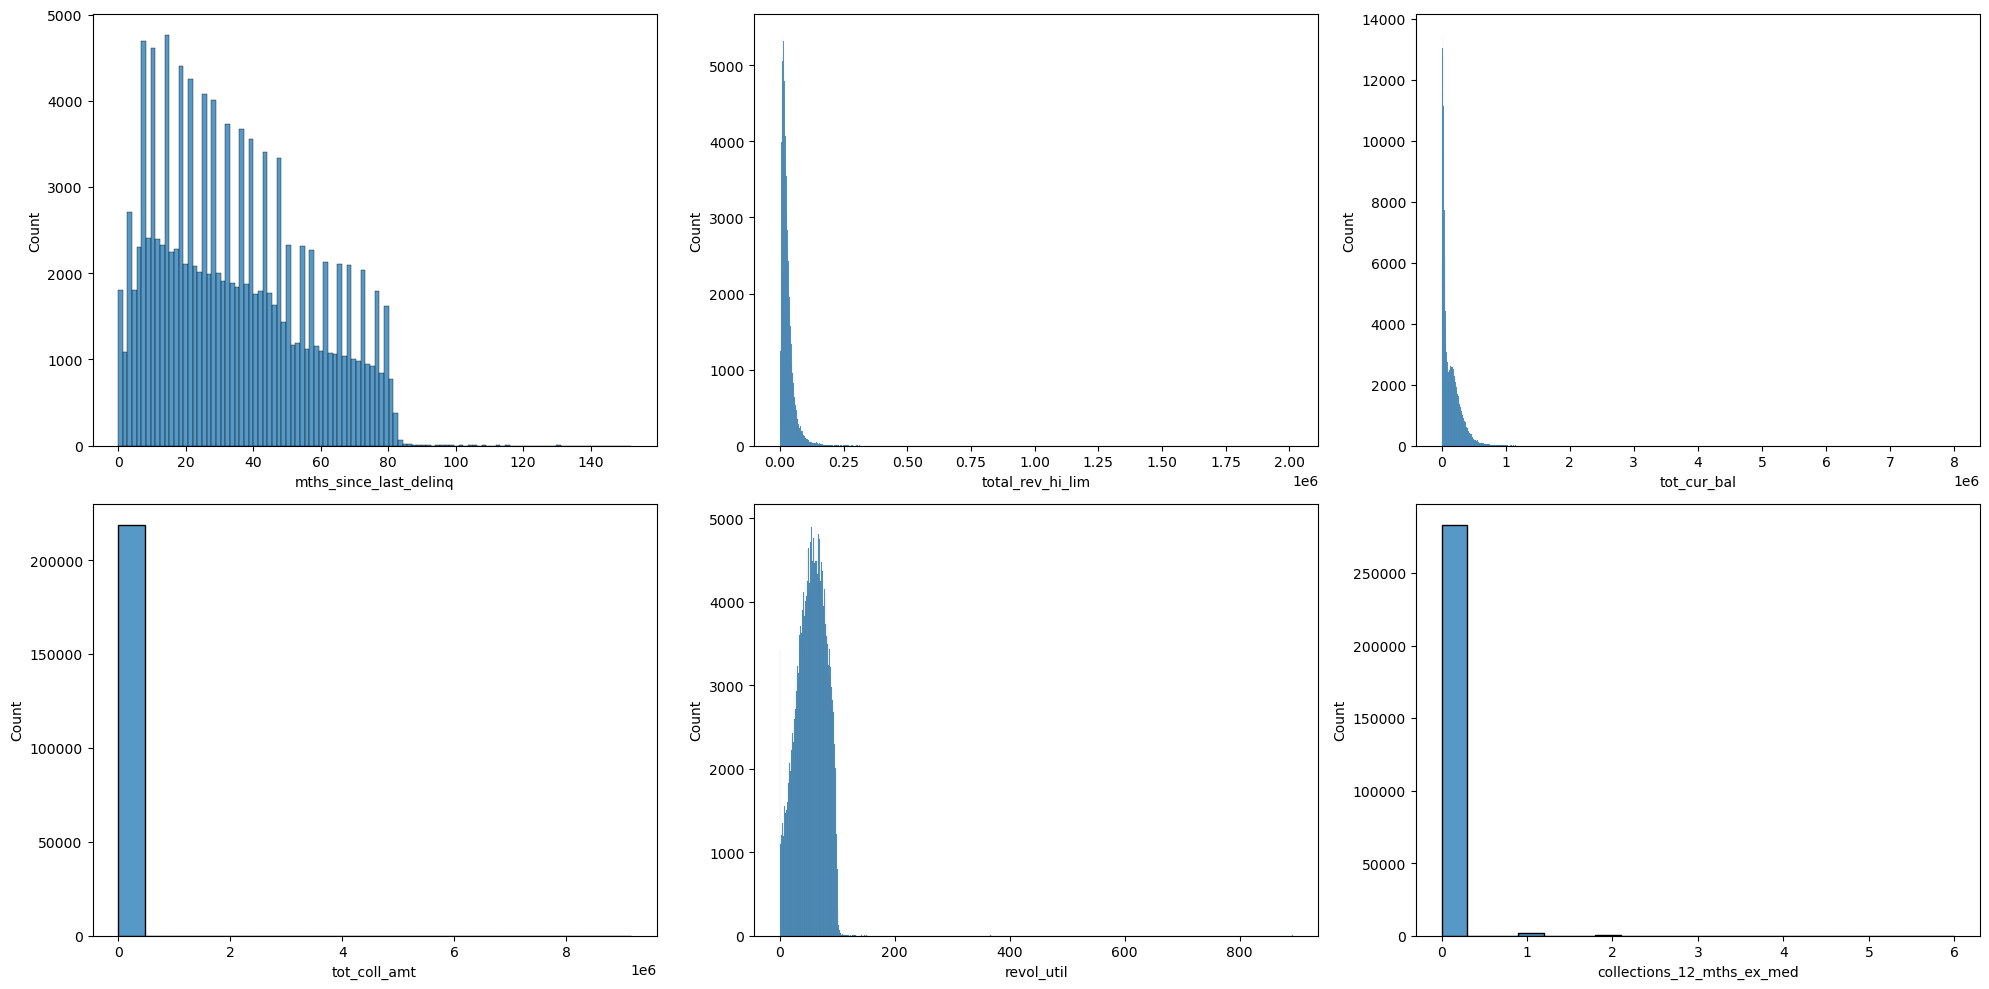

In [92]:
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize = (20,10))
axs = axs.flatten()


for i, var in enumerate(num):
    sns.histplot(x = var, data = data, ax = axs[i])
    
fig.tight_layout()

In [110]:
df.loc[:,num].describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_delinq,112151.0,35.175531,21.802850,0.0,17.0,32.0,51.0,152.0
total_rev_hi_lim,189263.0,29709.117397,29517.296672,0.0,13300.0,22300.0,36800.0,2013133.0
tot_cur_bal,189263.0,138331.152328,152436.719167,0.0,28372.5,81002.0,208229.0,8000078.0
tot_coll_amt,189263.0,203.823642,21102.058037,0.0,0.0,0.0,0.0,9152545.0
revol_util,252772.0,54.312093,24.790577,0.0,36.3,55.8,73.9,892.3
collections_12_mths_ex_med,252915.0,0.006726,0.089005,0.0,0.0,0.0,0.0,6.0
inq_last_6mths,252971.0,0.852485,1.066875,0.0,0.0,1.0,1.0,8.0
total_acc,252971.0,25.035905,11.747131,2.0,16.0,23.0,32.0,150.0
pub_rec,252971.0,0.143439,0.436383,0.0,0.0,0.0,0.0,15.0
